In [0]:
import gdown

In [0]:
url = "https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw"

In [0]:
gdown.download(url,'data1',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw
To: /content/data1
74.6MB [00:00, 120MB/s] 


'data1'

In [0]:
import zipfile 
with zipfile.ZipFile("data1",'r') as zip_ref:
   zip_ref.extractall('data2/')

In [0]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


# **3 Convolution & Dropout 0.25**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 493s 4s/step - loss: 3.0159 - acc: 0.1170 - val_loss: 2.4322 - val_acc: 0.2932
Epoch 2/15
125/125 [==============================] - 463s 4s/step - loss: 2.2562 - acc: 0.3266 - val_loss: 1.7659 - val_acc: 0.5182
Epoch 3/15
125/125 [==============================] - 460s 4s/step - loss: 1.7385 - acc: 0.4563 - val_loss: 1.2047 - val_acc: 0.6506
Epoch 4/15
125/125 [==============================] - 460s 4s/step - loss: 1.3604 - acc: 0.5733 - val_loss: 0.9624 - val_acc: 0.7167
Epoch 5/15
125/125 [==============================] - 459s 4s/step - loss: 1.0517 - acc: 0.6598 - val_loss: 0.5820 - val_acc: 0.8290
Epoch 6/15
125/125 [==============================] - 459s 4s/step - loss: 0.8267 - acc: 0.7217 - val_loss: 0.4861 - val_acc: 0.8469
Epoch 7/15
125/125 [==============================] - 464s 4s/step - loss: 0.6283 - acc: 0.7910 - val_loss: 0.3202 - 

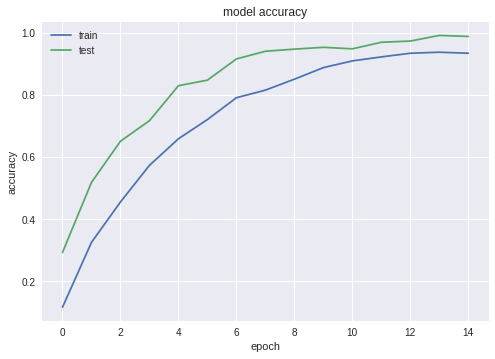

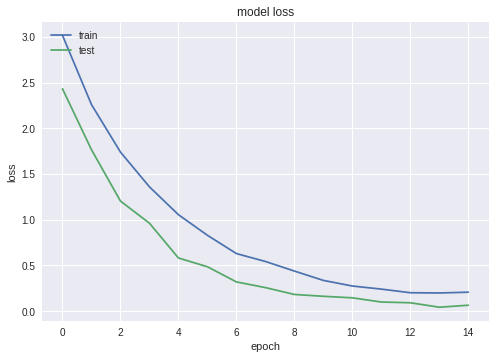

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 3 Convolution & Dropout 0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 483s 4s/step - loss: 3.1240 - acc: 0.0752 - val_loss: 2.9341 - val_acc: 0.1541
Epoch 2/15
125/125 [==============================] - 463s 4s/step - loss: 2.6074 - acc: 0.2309 - val_loss: 2.0140 - val_acc: 0.4717
Epoch 3/15
125/125 [==============================] - 459s 4s/step - loss: 2.0027 - acc: 0.3779 - val_loss: 1.5299 - val_acc: 0.5194
Epoch 4/15
125/125 [==============================] - 459s 4s/step - loss: 1.6185 - acc: 0.4884 - val_loss: 1.0007 - val_acc: 0.7391
Epoch 5/15
125/125 [==============================] - 456s 4s/step - loss: 1.2526 - acc: 0.5966 - val_loss: 0.7435 - val_acc: 0.7786
Epoch 6/15
125/125 [==============================] - 454s 4s/step - loss: 1.0176 - acc: 0.6701 - val_loss: 0.6270 - val_acc: 0.8332
Epoch 7/15
125/125 [==============================] - 450s 4s/step - loss: 0.8505 - acc: 0.7166 - val_loss: 0.4676 - 

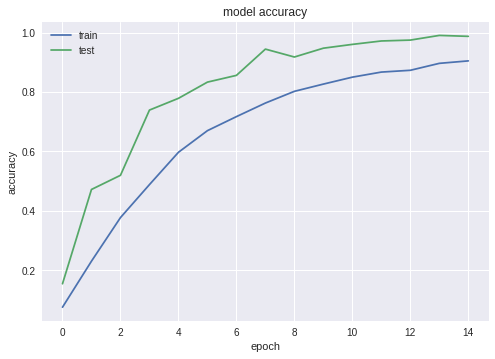

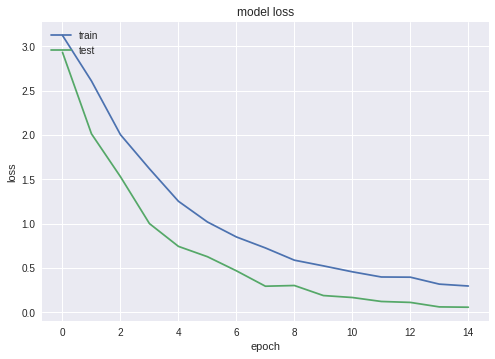

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 4 Convolution & Dropout 0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 514s 4s/step - loss: 3.1617 - acc: 0.0525 - val_loss: 3.1325 - val_acc: 0.0501
Epoch 2/15
125/125 [==============================] - 484s 4s/step - loss: 3.0761 - acc: 0.0935 - val_loss: 2.8211 - val_acc: 0.2246
Epoch 3/15
125/125 [==============================] - 487s 4s/step - loss: 2.5516 - acc: 0.2530 - val_loss: 2.0318 - val_acc: 0.4230
Epoch 4/15
125/125 [==============================] - 494s 4s/step - loss: 2.0593 - acc: 0.3814 - val_loss: 1.5874 - val_acc: 0.5959
Epoch 5/15
125/125 [==============================] - 489s 4s/step - loss: 1.6905 - acc: 0.4721 - val_loss: 1.1948 - val_acc: 0.6880
Epoch 6/15
125/125 [==============================] - 493s 4s/step - loss: 1.3937 - acc: 0.5587 - val_loss: 0.9972 - val_acc: 0.7511
Epoch 7/15
125/125 [==============================] - 491s 4s/step - loss: 1.0945 - acc: 0.6464 - val_loss: 0.9081 - 

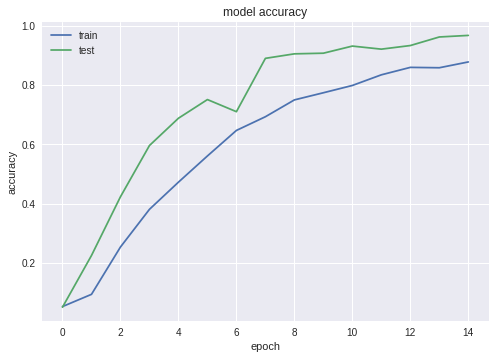

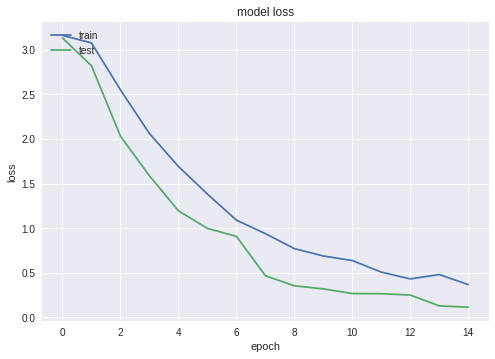

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding forth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
